<a href="https://colab.research.google.com/github/paiml/minimal-python/blob/master/Chapter7_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a chapter in the book Minimal Python**

* [Buy a copy on LeanPub](https://leanpub.com/minimalpython)
* [Buy a copy from Amazon](https://www.amazon.com/Minimal-Python-efficient-programmer-onemillion2021-ebook/dp/B0855NSRR7)

[*Licensed Under Attribution-NonCommercial-ShareAlike 4.0*](https://creativecommons.org/licenses/by-nc-sa/4.0/)

![Minimal Python Book](https://d2sofvawe08yqg.cloudfront.net/minimalpython/hero?1582640276)

## Ingest

*Data from [New York Times Github](https://github.com/nytimes/covid-19-data)*

In [120]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Last five rows

In [121]:
df.tail()

,date,state,fips,cases,deaths
1381,2020-03-27,Virginia,51,606,14
1382,2020-03-27,Washington,53,3770,177
1383,2020-03-27,West Virginia,54,96,0
1384,2020-03-27,Wisconsin,55,930,16
1385,2020-03-27,Wyoming,56,73,0


*What are the columns?*

In [122]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

*What is the shape:  i.e. rows,columns?*

In [123]:
df.shape

(1386, 5)

## EDA

*What are general characteristics of the data?  A good way to find out is `df.describe`*

In [124]:
df.describe()

,fips,cases,deaths
count,1386.000000,1386.000000,1386.000000
mean,30.349928,344.105339,5.204185
std,17.692220,2158.829201,25.836716
min,1.000000,1.000000,0.000000
25%,17.000000,3.000000,0.000000
50%,30.000000,21.000000,0.000000
75%,45.000000,122.500000,1.000000
max,78.000000,44635.000000,535.000000


*Cases and Deaths in the USA due to Covid-19*

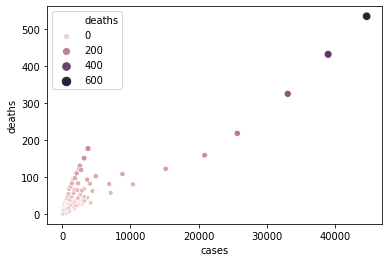

In [125]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

### Date-based EDA

*Dealing with dates by setting index*

In [126]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-03-27', '2020-03-27', '2020-03-27', '2020-03-27',
               '2020-03-27', '2020-03-27', '2020-03-27', '2020-03-27',
               '2020-03-27', '2020-03-27'],
              dtype='datetime64[ns]', name='date', length=1386, freq=None)

*Filter results by date range*

In [127]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}") 

Today 2020-03-29
Two days ago 2020-03-27


In [128]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2020-03-27,Alabama,1,639,4
2020-03-27,Alaska,2,85,1
2020-03-27,Arizona,4,665,15
2020-03-27,Arkansas,5,386,3
2020-03-27,California,6,4914,102


*The distribution of the data by date*

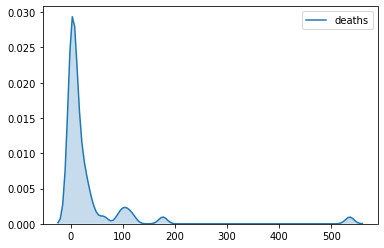

In [129]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

*Sort DataFrame in place by states with highest deaths and cases and show first 10 results*

In [130]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-03-27,New York,36,44635,535
2020-03-27,Washington,53,3770,177
2020-03-27,Louisiana,22,2746,119
2020-03-27,New Jersey,34,8825,108
2020-03-27,California,6,4914,102
2020-03-27,Michigan,26,3657,93
2020-03-27,Georgia,13,2198,64
2020-03-27,Florida,12,3198,46
2020-03-27,Illinois,17,3029,37


*There should be 50 states and District of Columbia*

In [131]:
current_df.shape

(51, 4)

### State Based Analysis

*Get 10 states and subset*

In [132]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'Washington',
 'Louisiana',
 'New Jersey',
 'California',
 'Michigan',
 'Georgia',
 'Florida',
 'Illinois',
 'Massachusetts']

In [0]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

*Verify the unique states left is the same 10*

In [154]:
set(top_states_df.state.values)

{'California',
 'Florida',
 'Georgia',
 'Illinois',
 'Louisiana',
 'Massachusetts',
 'Michigan',
 'New Jersey',
 'New York',
 'Washington'}

<Figure size 1080x360 with 0 Axes>

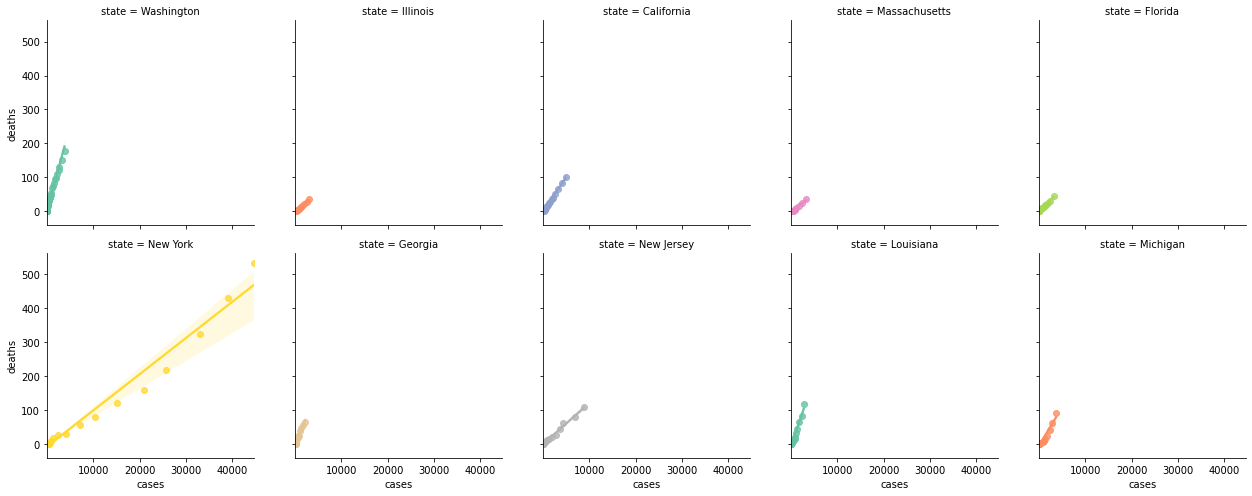

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

*Interactive plot of top states*

In [182]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-09,Louisiana,1,0
2020-03-10,Michigan,2,0
2020-03-11,Michigan,2,0
2020-03-08,New Jersey,6,0
2020-03-10,Louisiana,6,0


In [188]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_march_current_df, x=top_states_march_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

## Modeling

## Conclusion
